$\textbf{Intro}$

In this work, we will build a 5-Day Mean Reversion alpha factor on a portfolio of 10 stocks using 10 years historical data, and evaluate it on different hodling periods. We denote this portfolio the universe as our trading strategy is built and statistically appreciated within this dataset. Portfolio and universe will be used interchangeably.

The selected stocks stand as the most traded stocks in average during the ten years considered; they also possed at least 8 years of trading data. 

The evaluation task is done with the alphalens library. 

Evaluation metrics include, expected forward returns, annualized Sharpe Ratio, information coefficient, Turnover, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
idx = pd.IndexSlice

In [3]:
data = pd.read_csv('HISTORIC_PRICES.csv', parse_dates=True, index_col=[0,1])

In [4]:
data

open   high      low  close      volume  ex-dividend  \
ticker date                                                                
A      1999-11-18  45.50  50.00  40.0000  44.00  44739900.0          0.0   
       1999-11-19  42.94  43.00  39.8100  40.38  10897100.0          0.0   
       1999-11-22  41.31  44.00  40.0600  44.00   4705200.0          0.0   
       1999-11-23  42.50  43.63  40.2500  40.25   4274400.0          0.0   
       1999-11-24  40.13  41.94  40.0000  41.06   3464400.0          0.0   
...                  ...    ...      ...    ...         ...          ...   
ZUMZ   2018-03-21  23.80  24.60  23.6058  23.95    354092.0          0.0   
       2018-03-22  23.90  24.35  23.3000  23.35    269607.0          0.0   
       2018-03-23  23.55  24.20  23.4500  23.55    301584.0          0.0   
       2018-03-26  23.75  24.80  23.7000  24.65    375320.0          0.0   
       2018-03-27  24.65  24.65  23.3500  23.60    403884.0          0.0   

                   split_ratio   adj_open   adj_high    adj_low  adj_close  \
ticker date                                                                  
A      1999-11-18          1.0  31.041951  34.112034  27.289627  30.018590   
       1999-11-19          1.0  29.295415  29.336350  27.160002  27.548879   
       1999-11-22          1.0  28.183363  30.018590  27.330562  30.018590   
       1999-11-23          1.0  28.995229  29.766161  27.460188  27.460188   
       1999-11-24          1.0  27.378319  28.613174  27.289627  28.012803   
...                        ...        ...        ...        ...        ...   
ZUMZ   2018-03-21          1.0  23.800000  24.600000  23.605800  23.950000   
       2018-03-22          1.0  23.900000  24.350000  23.300000  23.350000   
       2018-03-23          1.0  23.550000  24.200000  23.450000  23.550000   
       2018-03-26          1.0  23.750000  24.800000  23.700000  24.650000   
       2018-03-27          1.0  24.650000  24.650000  23.350000  23.600000   

                   adj_volume  
ticker date                    
A      1999-11-18  44739900.0  
       1999-11-19  10897100.0  
       1999-11-22   4705200.0  
       1999-11-23   4274400.0  
       1999-11-24   3464400.0  
...                       ...  
ZUMZ   2018-03-21    354092.0  
       2018-03-22    269607.0  
       2018-03-23    301584.0  
       2018-03-26    375320.0  
       2018-03-27    403884.0  

[15389314 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, ('A', Timestamp('1999-11-18 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   open         float64
 1   high         float64
 2   low          float64
 3   close        float64
 4   volume       float64
 5   ex-dividend  float64
 6   split_ratio  float64
 7   adj_open     float64
 8   adj_high     float64
 9   adj_low      float64
 10  adj_close    float64
 11  adj_volume   float64
dtypes: float64(12)
memory usage: 1.4+ GB


 We begin the selection process of our universe. Note that the attributes such as  adjacent open, adjacent high, adjacent low, adjacent close and adjacent volume are considered. 

In [6]:
data = data.filter(like='adj_').rename(columns=lambda x: x.replace('adj_', '')).loc[idx[:, '2006':'2016'], :].dropna()

In [7]:
data

open       high        low      close     volume
ticker date                                                             
A      2006-01-03  22.786839  22.909642  22.387796  22.855063  3796200.0
       2006-01-04  22.889175  23.080202  22.766372  22.916465  3001300.0
       2006-01-05  22.820951  23.516836  22.820951  23.516836  3458800.0
       2006-01-06  23.537304  23.735153  23.257585  23.639640  4396500.0
       2006-01-09  23.639640  23.741976  23.482724  23.571416  2920500.0
...                      ...        ...        ...        ...        ...
ZUMZ   2016-12-23  20.950000  21.500000  20.950000  21.350000   532292.0
       2016-12-27  21.200000  21.700000  21.200000  21.450000   308004.0
       2016-12-28  21.550000  21.749900  21.325000  21.450000   165827.0
       2016-12-29  21.550000  22.050000  21.400000  21.900000   322108.0
       2016-12-30  21.900000  22.190000  21.600000  21.850000   295429.0

[7531907 rows x 5 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7531907 entries, ('A', Timestamp('2006-01-03 00:00:00')) to ('ZUMZ', Timestamp('2016-12-30 00:00:00'))
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   open    float64
 1   high    float64
 2   low     float64
 3   close   float64
 4   volume  float64
dtypes: float64(5)
memory usage: 316.8+ MB


The goal is to build the universe on which alpha factors will be evaluated.

The universe consists of 10 most traded stocks which have trading data of at least 8 years. 

In [9]:
dv = data.close.mul(data.volume)
dv

ticker  date      
A       2006-01-03    8.676239e+07
        2006-01-04    6.877919e+07
        2006-01-05    8.134003e+07
        2006-01-06    1.039317e+08
        2006-01-09    6.884032e+07
                          ...     
ZUMZ    2016-12-23    1.136443e+07
        2016-12-27    6.606686e+06
        2016-12-28    3.556989e+06
        2016-12-29    7.054165e+06
        2016-12-30    6.455124e+06
Length: 7531907, dtype: float64

In [10]:
dv = dv.unstack('ticker').dropna(thresh=8*252, axis=1).rank(axis=1, ascending=True).mean(axis=0).nlargest(10)
dv

ticker
AAPL     2449.400506
GOOGL    2445.394727
MSFT     2443.527266
BAC      2442.746479
XOM      2441.949079
C        2440.485374
JPM      2435.513904
GE       2434.914048
INTC     2434.508126
CSCO     2431.022030
dtype: float64

The resulting universe of stocks that is:

In [11]:
dv.index.to_list()

['AAPL', 'GOOGL', 'MSFT', 'BAC', 'XOM', 'C', 'JPM', 'GE', 'INTC', 'CSCO']

In [12]:
# now the universe
universe = data.loc[idx[dv.index.to_list(), :], :]
universe

open       high        low      close       volume
ticker date                                                               
AAPL   2006-01-03   9.295670   9.606417   9.285132   9.606417  201808600.0
       2006-01-04   9.655252   9.764489   9.574288   9.634690  154900900.0
       2006-01-05   9.616698   9.625694   9.477903   9.558867  112355600.0
       2006-01-06   9.669389   9.857019   9.580714   9.805613  176114400.0
       2006-01-09   9.860874   9.921276   9.733646   9.773485  168760200.0
...                      ...        ...        ...        ...          ...
CSCO   2016-12-23  29.484966  29.542893  29.349802  29.475311    9167598.0
       2016-12-27  29.581511  29.755293  29.542893  29.620129   14175488.0
       2016-12-28  29.639438  29.707020  29.301529  29.369111   12022231.0
       2016-12-29  29.320838  29.494620  29.282220  29.407729   10995584.0
       2016-12-30  29.504275  29.542893  29.089130  29.176020   20190029.0

[27690 rows x 5 columns]

In [13]:
universe.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27690 entries, ('AAPL', Timestamp('2006-01-03 00:00:00')) to ('CSCO', Timestamp('2016-12-30 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    27690 non-null  float64
 1   high    27690 non-null  float64
 2   low     27690 non-null  float64
 3   close   27690 non-null  float64
 4   volume  27690 non-null  float64
dtypes: float64(5)
memory usage: 1.9+ MB


In [14]:
universe.index.unique('ticker')

Index(['AAPL', 'GOOGL', 'MSFT', 'BAC', 'XOM', 'C', 'JPM', 'GE', 'INTC',
       'CSCO'],
      dtype='object', name='ticker')

In [15]:
# remove outliers of daily returns
daily_returns = universe.close.pct_change()
daily_returns

ticker  date      
AAPL    2006-01-03         NaN
        2006-01-04    0.002943
        2006-01-05   -0.007870
        2006-01-06    0.025813
        2006-01-09   -0.003277
                        ...   
CSCO    2016-12-23    0.002298
        2016-12-27    0.004913
        2016-12-28   -0.008475
        2016-12-29    0.001315
        2016-12-30   -0.007879
Name: close, Length: 27690, dtype: float64

In [16]:
daily_returns.between(-1, +1)

ticker  date      
AAPL    2006-01-03    False
        2006-01-04     True
        2006-01-05     True
        2006-01-06     True
        2006-01-09     True
                      ...  
CSCO    2016-12-23     True
        2016-12-27     True
        2016-12-28     True
        2016-12-29     True
        2016-12-30     True
Name: close, Length: 27690, dtype: bool

In [17]:
universe = universe[daily_returns.between(-1, +1)]
universe

open       high        low      close       volume
ticker date                                                               
AAPL   2006-01-04   9.655252   9.764489   9.574288   9.634690  154900900.0
       2006-01-05   9.616698   9.625694   9.477903   9.558867  112355600.0
       2006-01-06   9.669389   9.857019   9.580714   9.805613  176114400.0
       2006-01-09   9.860874   9.921276   9.733646   9.773485  168760200.0
       2006-01-10   9.799188  10.524006   9.745212  10.391637  569967300.0
...                      ...        ...        ...        ...          ...
CSCO   2016-12-23  29.484966  29.542893  29.349802  29.475311    9167598.0
       2016-12-27  29.581511  29.755293  29.542893  29.620129   14175488.0
       2016-12-28  29.639438  29.707020  29.301529  29.369111   12022231.0
       2016-12-29  29.320838  29.494620  29.282220  29.407729   10995584.0
       2016-12-30  29.504275  29.542893  29.089130  29.176020   20190029.0

[27688 rows x 5 columns]

In [18]:
universe.index.unique('ticker')

Index(['AAPL', 'GOOGL', 'MSFT', 'BAC', 'XOM', 'C', 'JPM', 'GE', 'INTC',
       'CSCO'],
      dtype='object', name='ticker')

# Build and evaluate alpha factors performance

### build alpha factor: 5-Day mean-reversion

We build a 5-day mean-reversion alpha factor. We will later evaluate its performance on different holding periods using the python alphalens library

In [24]:
alpha_factors = -1*universe.close.pct_change(5).unstack('ticker').dropna()
alpha_factors = alpha_factors.stack('ticker')
alpha_factors

date        ticker
2006-01-11  AAPL     -0.119114
            GOOGL    -0.059271
            MSFT     -0.011865
            BAC       0.010305
            XOM      -0.029025
                        ...   
2016-12-30  C         0.017524
            JPM       0.006905
            GE        0.006914
            INTC      0.017872
            CSCO      0.007879
Length: 27630, dtype: float64

In [30]:
# demean and rank the alpha factor

# demean alpha factor
def demean_alpha(alpha_factor):
    data = alpha_factor.copy()
    demeaned_alpha = alpha_factor - data.groupby('date').transform('mean')
    
    return demeaned_alpha

# rank alpha factor
def ranking_alpha(alpha_factor):
    
    return alpha_factor.unstack('ticker').rank(axis=1, ascending=True).stack('ticker')


In [32]:
demeaned_alpha = demean_alpha(alpha_factors)
demeaned_alpha

date        ticker
2006-01-11  AAPL     -0.084368
            GOOGL    -0.024525
            MSFT      0.022881
            BAC       0.045051
            XOM       0.005721
                        ...   
2016-12-30  C         0.004440
            JPM      -0.006178
            GE       -0.006170
            INTC      0.004788
            CSCO     -0.005204
Length: 27630, dtype: float64

In [33]:
ranked_alpha = ranking_alpha(demeaned_alpha)
ranked_alpha

date        ticker
2006-01-11  AAPL       1.0
            GOOGL      3.0
            MSFT       7.0
            BAC       10.0
            XOM        4.0
                      ... 
2016-12-30  C          6.0
            JPM        3.0
            GE         4.0
            INTC       7.0
            CSCO       5.0
Length: 27630, dtype: float64

### Evaluate alpha factors: alphalens 

We evaluate the alpha factor strategy on different holding periods and different quantiles with the alphalens .

This evaluation phase is actually a necessary step where we can decide whether or not the alpha factor is worth being considered further in the process including backtesting. 

In [34]:
import alphalens as al

In [35]:
closing_prices = universe.close.unstack('ticker')
closing_prices

ticker,AAPL,GOOGL,MSFT,BAC,XOM,C,JPM,GE,INTC,CSCO
date,,,,,,,,,,
2006-01-04,9.634690,223.309335,20.452419,36.857078,42.736042,407.547758,29.572932,23.323910,17.966813,14.750795
2006-01-05,9.558867,226.318624,20.467586,36.904554,42.524441,409.569491,29.662501,23.264478,18.216519,15.163982
2006-01-06,9.805613,233.550949,20.406919,36.849165,43.363547,409.569491,29.871497,23.422964,18.244256,15.511060
2006-01-09,9.773485,234.172919,20.369002,36.872903,43.341657,407.631996,30.356667,23.363532,18.355206,15.750708
2006-01-10,10.391637,235.607297,20.475169,36.564310,43.677300,408.895580,30.401452,23.238064,18.112434,15.676335
...,...,...,...,...,...,...,...,...,...,...
2016-12-27,115.811668,809.930000,61.903920,22.356110,87.432359,60.208026,85.204605,31.075043,35.846409,29.620129
2016-12-28,115.317843,804.570000,61.620226,22.079254,86.998810,59.173185,84.588527,30.880215,35.420932,29.369111
2016-12-29,115.288214,802.880000,61.532183,21.752960,87.046983,58.522714,83.992006,30.889956,35.449942,29.407729


In [36]:
# preprocessing the alpha data
holding_periods = (1, 2, 3, 4)
quantiles = 5

alpha_data = al.utils.get_clean_factor_and_forward_returns(factor=ranked_alpha,
                                                           prices=closing_prices,
                                                           periods=holding_periods,
                                                           quantiles=quantiles)
                                                                                                                                                                                                                                                                                     

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [37]:
alpha_data

1D        2D        3D        4D  factor  \
date       asset                                                   
2006-01-11 AAPL   0.004660  0.020142  0.009656 -0.016805     1.0   
           GOOGL -0.016962 -0.011407 -0.009584 -0.056655     3.0   
           MSFT  -0.005497 -0.003664 -0.010993 -0.016856     7.0   
           BAC   -0.006508 -0.006508 -0.017137 -0.018221    10.0   
           XOM   -0.010453  0.011614  0.021072  0.013605     4.0   
...                    ...       ...       ...       ...     ...   
2016-12-27 C     -0.017188 -0.027991 -0.027173 -0.027173     1.0   
           JPM   -0.007231 -0.014232 -0.009641 -0.650921     2.0   
           GE    -0.006270 -0.005956 -0.009404 -0.248370     3.0   
           INTC  -0.011869 -0.011060 -0.021581 -0.505359     6.0   
           CSCO  -0.008475 -0.007171 -0.014993 -0.513161     8.0   

                  factor_quantile  
date       asset                   
2006-01-11 AAPL                 1  
           GOOGL                2  
           MSFT                 4  
           BAC                  5  
           XOM                  2  
...                           ...  
2016-12-27 C                    1  
           JPM                  1  
           GE                   2  
           INTC                 3  
           CSCO                 4  

[27600 rows x 6 columns]

#### factor forward returns
calculate the daily forward returns on different holding periods.

In [38]:
factor_returns = al.performance.factor_returns(alpha_data)
factor_returns

,1D,2D,3D,4D
date,,,,
2006-01-11,-0.000534,-0.003393,-0.004638,-0.007240
2006-01-12,-0.003283,-0.004515,-0.011908,-0.007205
2006-01-13,-0.001878,-0.018187,-0.016168,-0.017173
2006-01-17,-0.014242,-0.009266,-0.006550,-0.017014
2006-01-18,0.000368,-0.006113,-0.005792,0.002483
...,...,...,...,...
2016-12-20,-0.001423,0.000338,-0.001641,-0.001466
2016-12-21,0.000929,-0.001004,-0.000927,-0.000099
2016-12-22,-0.000076,0.000425,-0.000504,-0.001747


#### sharpe ratio

This is the ratio of reward to volatility. It is a metric used in trading to measure the performance (mean return) of our portfolio relative to its risk (volatility) on the considered holding periods.  We are going to calculate the annualized Sharpe ratio on daily forward returns, for each holding period.

In [43]:
sharpe_ratio = np.sqrt(252)*factor_returns.mean().div(factor_returns.std()).to_frame().rename(columns={0:'Sharpe Ratio'})
sharpe_ratio

,Sharpe Ratio
1D,0.016781
2D,0.349566
3D,0.504282
4D,0.426564


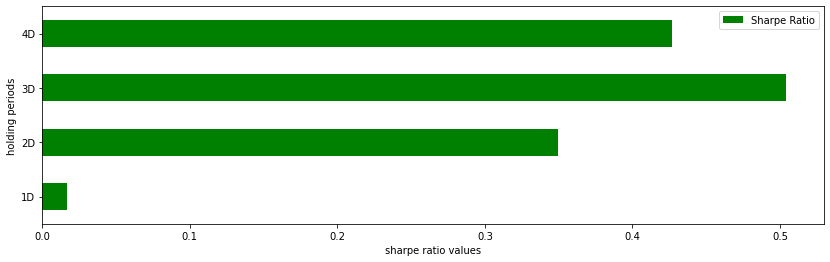

In [48]:
sharpe_ratio.plot.barh(color='g', figsize=(14, 4));
plt.xlabel('sharpe ratio values');
plt.ylabel('holding periods');

Sharpe ratio is positive for each holding period and is below one. 

Besides, the best sharpe ratio is observed when the holding period is 3 day. 

The higher the Sharpe ratio, the better is the trading strategy. However, with this fairly trading strategy, the Sharpe ratio observed for 3-day holding period is OK.

#### quantile analysis

We classifiy the portfolio forward returns into quantiles and  analyze the portfolion's performance within each quantile. That means, we compute the mean of the portfolio's forward return on each holding period.

In [49]:
mean_ret_quantile, mean_std_quantile = al.performance.mean_return_by_quantile(alpha_data)
mean_ret_quantile

,1D,2D,3D,4D
factor_quantile,,,,
1,-0.000167,-0.000746,-0.001028,-0.001229
2,0.000200,0.000272,0.000120,0.000557
3,0.000172,0.000066,0.000083,-0.000072
4,-0.000104,0.000365,0.000309,0.000211
5,-0.000099,0.000047,0.000520,0.000538


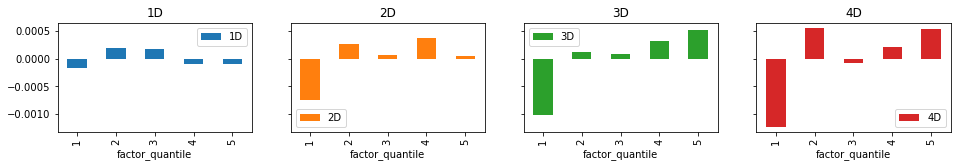

In [53]:
mean_ret_quantile.plot.bar(subplots=True,
                           layout=(1,4),
                           sharey=True,
                           figsize=(16,2));
                          
                          

In [54]:
# now we are going to plot the grouped bar for comparison
from alphalens.plotting import*

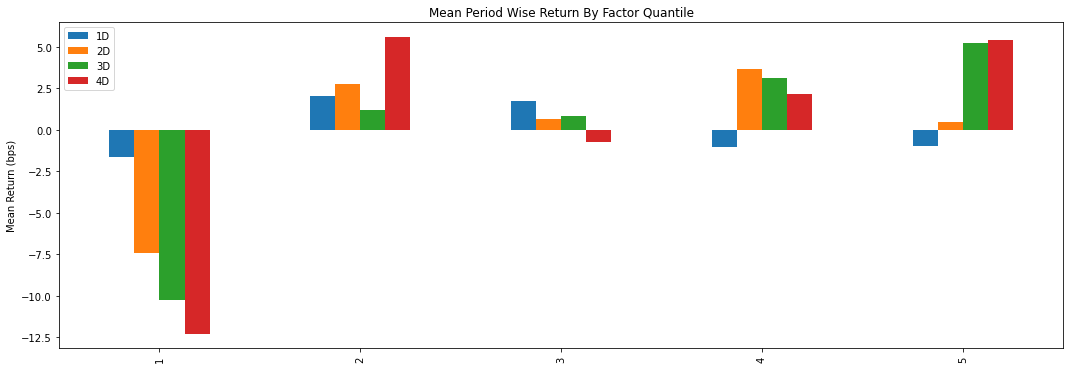

In [57]:
plot_quantile_returns_bar(mean_ret_quantile);

Regarding the quantile-wise factor returns, we can see that with the 3 and 4 day holding periods, the first quantile has shown the lowest returns, while the last quantile (5th quantile) has shown the highest return.

Besides, the pattern observed in the returns accross quantiles exhibit in general a gradual and consistent increase from the lowest quantile to the highest quantile, except perhaps the second quantile.

The second and third quantiles are around zero indicating almost neutral performance.

With the 3-day holding period, this strategy has effectively differentiated between better-performing and worse-performing stocks

$\textbf{Strategy Evaluation:}$ This pattern of returns suggests that the strategy is successful in ranking stocks according to their expected performance. Stocks predicted to perform well (higher quantiles) indeed yield higher returns, and those predicted to perform poorly (lower quantiles) yield lower or negative returns.

$\textbf{Advice:}$ So far, one might consider focussing on stocks in the highest and lowest quantiles for investing with the underlying strategy. However, since the only results we have so far come from past data, we will need to continue the investigation and evaluate further performance metrics on this strategy.

#### cumulative returns:

We want to see the investment performance within each of the signal quintiles over time.

For that we first compute the daily returns by quantile as opposed to the previous average returns by quantile. Then we visualize the evolution of cumulative returns in each quintile.


In [61]:
mean_ret_quantile_daily, mean_std_quantile_daily = al.performance.mean_return_by_quantile(alpha_data, by_date=True)

In [62]:
mean_ret_quantile_daily

1D        2D        3D        4D
factor_quantile date                                              
1               2006-01-11  0.005287  0.003466 -0.002009  0.007173
                2006-01-12 -0.001942 -0.007430  0.002000 -0.004952
                2006-01-13  0.005548  0.010172 -0.000728  0.007430
                2006-01-17  0.004665 -0.006431  0.001805  0.010867
                2006-01-18 -0.011314 -0.002727  0.006468 -0.006119
...                              ...       ...       ...       ...
5               2016-12-20 -0.001052  0.004047  0.003211  0.003762
                2016-12-21  0.002901 -0.000241 -0.000838  0.001776
                2016-12-22 -0.000935 -0.001532 -0.002633 -0.007663
                2016-12-23 -0.001689 -0.001963 -0.005667  0.000624
                2016-12-27  0.002784  0.004348 -0.003536 -0.380377

[13800 rows x 4 columns]

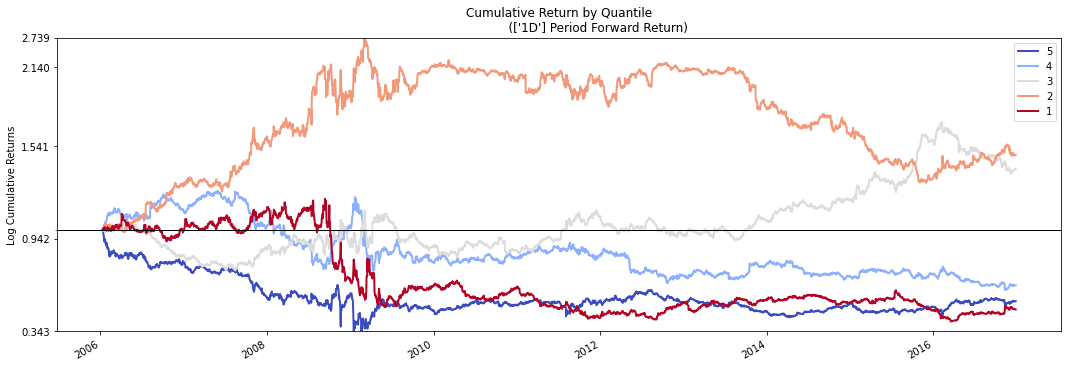

In [67]:
plot_cumulative_returns_by_quantile(mean_ret_quantile_daily['1D'], period=['1D']);

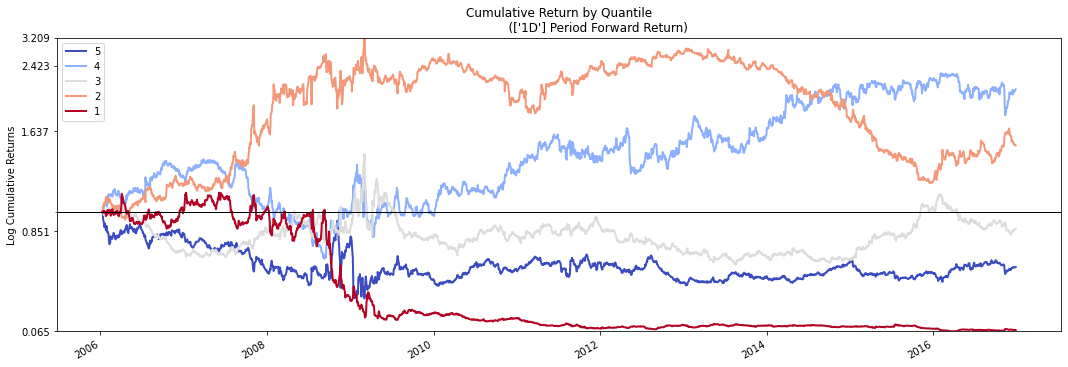

In [68]:
plot_cumulative_returns_by_quantile(mean_ret_quantile_daily['2D'], period=['1D']);

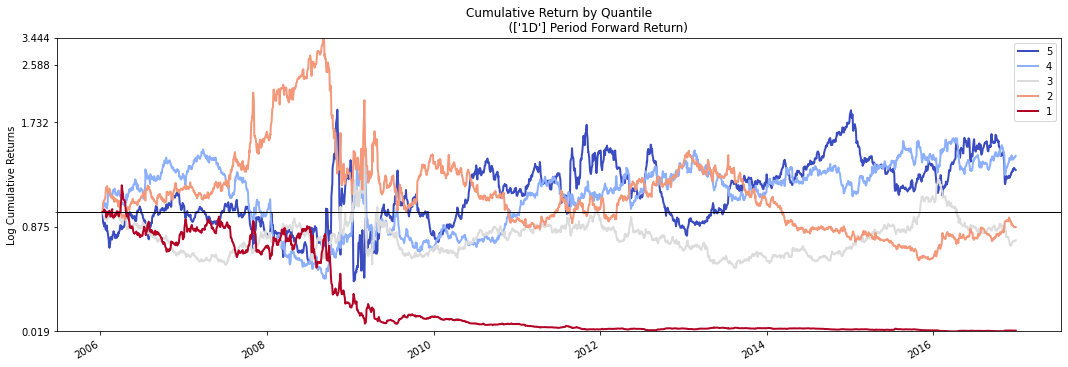

In [69]:
plot_cumulative_returns_by_quantile(mean_ret_quantile_daily['3D'], period=['1D']);

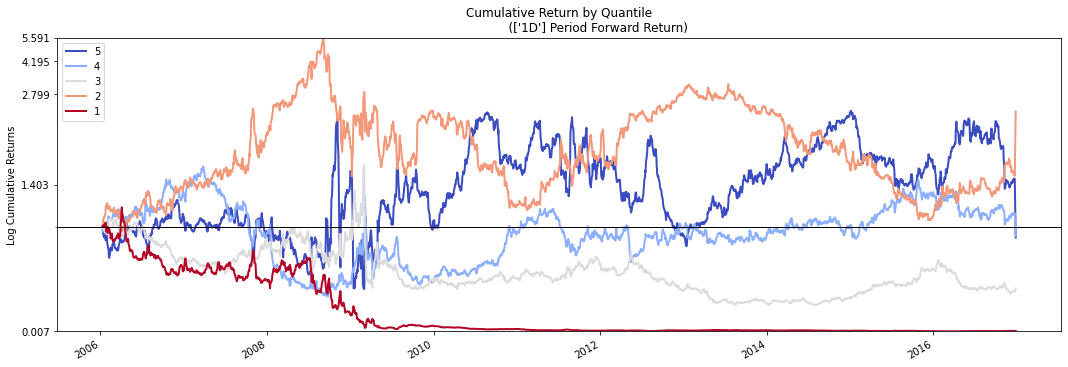

In [70]:
plot_cumulative_returns_by_quantile(mean_ret_quantile_daily['4D'], period=['1D']);

The visualisations of the investment growth show that 3 and 4 holding days yields a good incentive to execute our positions in this durationg. Besides, considering the annualized Sharpe ratio, the investment strategy is in particular promising with 3-Day holding period.

Indeed, the cumulative return plots have shown that, with 3 and 4 day holding periods, stocks in the highest quantile (those predicted to perform the best) show higher cumulative returns over time, which would indicate that the factor used to sort the stocks is effectively predictive.
The same is even more pronounced for the stocks in the lowest quantile(those that are being shorted).  They show lowest cumulative returns over time.  

Therefore, the 5-day mean reversion alpha factor is predictive on 3 and 4 day holding periods.

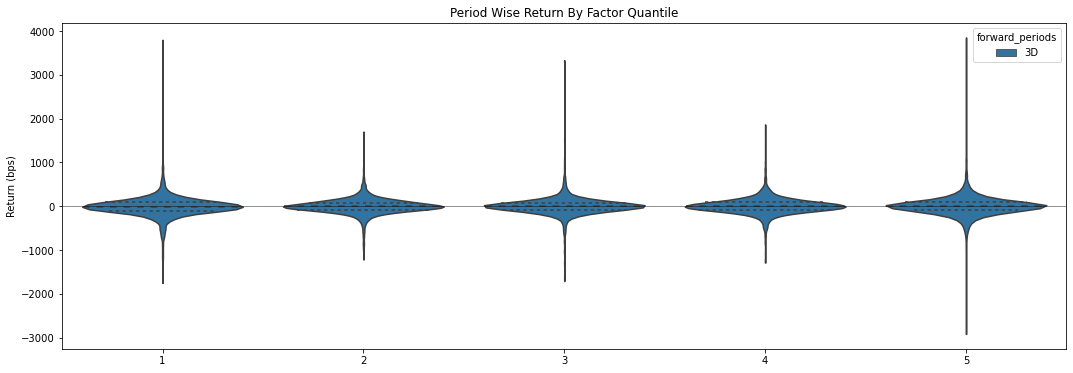

In [71]:
plot_quantile_returns_violin(mean_ret_quantile_daily['3D'].to_frame());

Here we have also visualized the distribution of returns for different quantiles over the 3-day holding period.

#### Information Coefficient (IC) 

We now evaluate the predictabibility of our alpha factor in different holding periods and denote the information coefficient (IC).  The IC tells us wether the alpha values are correlated with the future returns. In practice, we calculate it using the rank correlation by considering both the rank of the alpha values and the rank of the futur returs. 
Note that, in general, we use the ranks to avoid the influence of outliers on calculations, but here, most importantly because we do not care to be wrong in the right direction. 

Correlation of rank values is called Spearman rank correlation to be distinguished from the Pearson correlation. It is given by
$$\mathrm{rankCorr}(X, Y) = \frac{\mathrm{cov}(rank(X), rank(Y))}{\mathrm{std}(rank(X))\times \mathrm{std}(rank(Y))}$$

Regarding the previous quantile analysis, we actually have an idea of what should be expected: high predictability for the 3-day holding period,  and low predictability for the 1, 2 and maybe 4 - day holding period

In [73]:
ic = al.performance.factor_information_coefficient(alpha_data)
ic

,1D,2D,3D,4D
date,,,,
2006-01-11,-0.030303,-0.078788,-0.284848,-0.090909
2006-01-12,-0.296970,-0.309091,0.212121,0.030303
2006-01-13,-0.200000,-0.260606,-0.357576,-0.393939
2006-01-17,0.006061,-0.139394,-0.127273,-0.236364
2006-01-18,-0.127273,-0.212121,-0.139394,-0.078788
...,...,...,...,...
2016-12-20,-0.430303,0.054545,-0.357576,-0.406061
2016-12-21,0.127273,-0.200000,-0.224242,0.030303
2016-12-22,0.151515,0.127273,-0.200000,-0.090909


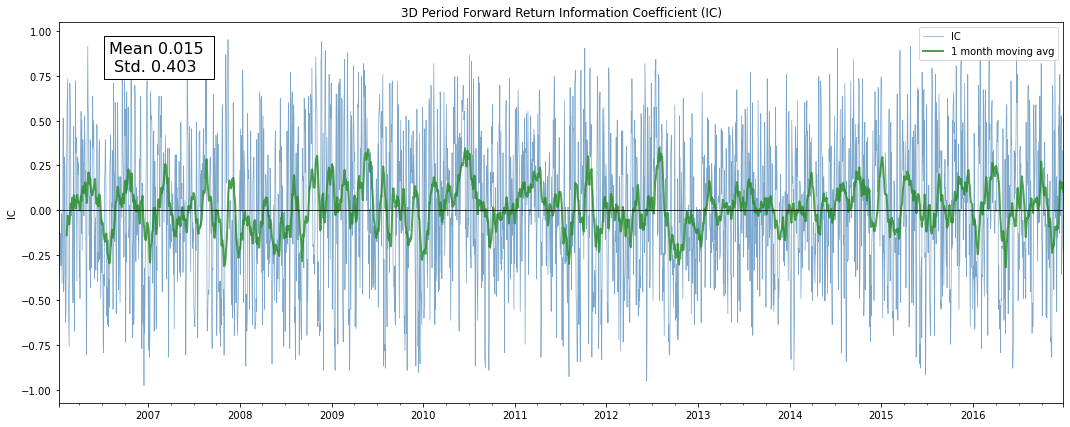

In [74]:
plot_ic_ts(ic[['3D']]);

We observe a significantly positive moving average of the IC for the 3-day holding period.

We also want to check the yearly information coefficient, or the annual mean information coefficient

In [75]:
ic_by_year = ic.resample('A').mean()
ic_by_year.index = ic_by_year.index.year
ic_by_year

,1D,2D,3D,4D
date,,,,
2006,0.001509,-0.021034,0.012195,0.032331
2007,-0.063817,-0.048606,-0.025186,-0.021128
2008,-0.018565,0.006875,-0.010372,-0.032555
2009,0.005583,0.018855,0.019870,0.024050
2010,0.009809,0.040939,0.052832,0.057868
2011,0.018325,0.035406,0.034632,0.026678
2012,-0.019811,-0.022442,-0.042812,-0.039273
2013,-0.003371,0.015346,0.016595,0.031506
2014,0.035904,0.054690,0.055652,0.055796


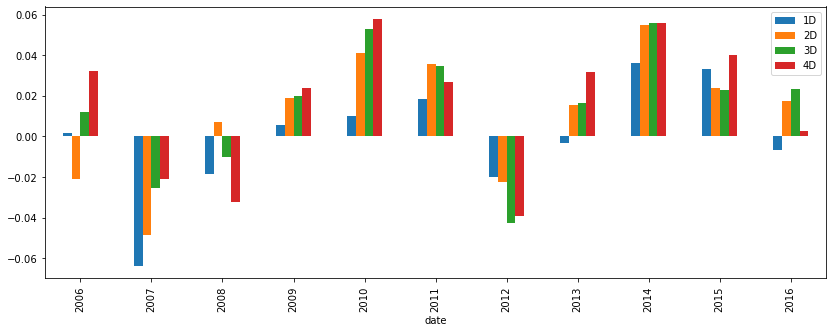

In [76]:
ic_by_year.plot.bar(figsize=(14, 5));

As we can see that our factor's performance on annual information coefficient was mostly acceptable for the 3 and 4 day holding periods. 

### IC summary statistics

Now we release a summary statistics of the trading stategy's performance

In [77]:
from alphalens.tears import*

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,2.0,1.500000,0.500045,5520,20.000000
2,3.0,4.0,3.500000,0.500045,5520,20.000000
3,5.0,6.5,5.500272,0.500317,5521,20.003623
4,7.0,8.0,7.500091,0.500045,5519,19.996377
5,9.0,10.0,9.500000,0.500045,5520,20.000000


Returns Analysis


,1D,2D,3D,4D
Ann. alpha,-0.009,0.024,0.031,0.019
beta,0.096,0.122,0.131,0.145
Mean Period Wise Return Top Quantile (bps),-0.989,0.233,1.734,1.344
Mean Period Wise Return Bottom Quantile (bps),-1.671,-3.731,-3.427,-3.073
Mean Period Wise Spread (bps),0.682,3.806,4.908,4.111


Information Analysis


,1D,2D,3D,4D
IC Mean,-0.001,0.011,0.015,0.016
IC Std.,0.405,0.404,0.403,0.401
Risk-Adjusted IC,-0.002,0.028,0.036,0.040
t-stat(IC),-0.092,1.448,1.896,2.120
p-value(IC),0.926,0.148,0.058,0.034
IC Skew,0.017,0.002,-0.051,-0.033
IC Kurtosis,-0.734,-0.738,-0.713,-0.727


Turnover Analysis


,1D,2D,3D,4D
Quantile 1 Mean Turnover,0.371,0.518,0.630,0.718
Quantile 2 Mean Turnover,0.607,0.705,0.742,0.766
Quantile 3 Mean Turnover,0.636,0.730,0.767,0.780
Quantile 4 Mean Turnover,0.594,0.703,0.748,0.774
Quantile 5 Mean Turnover,0.367,0.511,0.618,0.707


,1D,2D,3D,4D
Mean Factor Rank Autocorrelation,0.718,0.509,0.322,0.153


<Figure size 432x288 with 0 Axes>

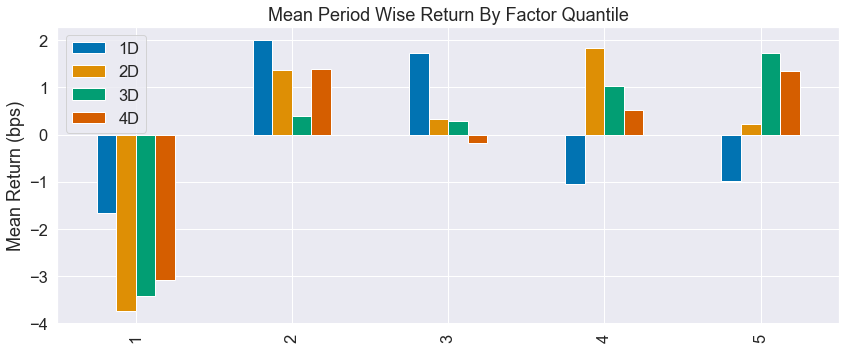

In [79]:
create_summary_tear_sheet(alpha_data)

#### Returns Analysis:

Ann. alpha measures our strategy's performance relative to the benchmark (say S&P500) for different holding periods, independant of the market's movements.

Basic Formula: 

$\alpha = R_p - (R_f + \beta\times (R_m - R_f))\\$
Alpha ($\alpha$)  is a measure of the portfolio's performance on a risk-adjusted basis. It shows how much excess return the portfolio has generated compared to what would be expected based on its beta and the market return.

A positive alpha indicates that the portfolio has outperformed the market, given its level of risk (as measured by beta), while a negative alpha suggests underperformance.

The term $(R_f + \beta\times (R_m - R_f))$ represents the expected return of the portfolio based on its beta and the market's excess return over the risk-free rate. Subtracting this from the actual portfolio return ($R_p$) isolates the return attributable to the skill of the portfolio manager or the effectiveness of the investment strategy, independent of market movements.

$R_p = \text{Portfolio returns}$

$R_f = \text{Risk free rate}$

$R_m = \text{Benchmark (market) return}$

$\beta = \frac{\mathrm{Cov}(R_p, R_m)}{\mathrm{Var}(R_m)}=$  The beta of the portfolio measures the portfolio volatility compared to the benchmark market. 

A Beta of $1$ means the portfolio will move with the benchmark. 

A Beta less than $1$ means the portfolio is theoretically less volatile than the market, and vice versa.

#### Information Coefficient analysis:

IC Mean: The average value of the Information Coefficient (IC) over different periods. Recall that the IC measures the correlation between predicted and actual stock returns. Therefore, a positive IC indicates that the predictions made by our alpha factor are generally accurate (this is the case in 2,3 4 - day holding periods), while a negative IC suggests poor predictions as in the 1-day holding period case. In conclusion, The IC Mean increases with the holding period, suggesting that the alpha factor's predictive power improves over longer periods.


IC Std. (Standard Deviation): This shows the variability or dispersion of the IC values. A higher standard deviation implies more variability in the prediction accuracy. We can see that the IC standard deviation does is almost constant over the periods.

Risk-Adjusted IC: Adjusts the IC for the risk (standard deviation) involved. It's essentially the IC Mean divided by the IC Standard Deviation.  We can see that the Risk-Adjusted IC also increases over time, indicating better risk-adjusted predictive power for longer holding periods.

t-stat(IC): The t-statistic for the IC. It indicates whether the IC is statistically significantly different from zero. Higher absolute values suggest greater statistical significance.

p-value(IC): Represents the probability that the IC is different from zero purely by chance. A lower p-value (typically <0.05) suggests that the IC is statistically significant. A higher p-value suggests that we may be observing a non-zero IC just by chance or by some random fluctuations. 


The null hypothesis:

"The Information Coefficient (IC) has no predictive power."

This means that there is no correlation between the predicted returns from our alpha model and the actual returns.
Regarding the results, we can see that the t-statistic increases and the p-value decreases over longer periods, suggesting that the factor becomes statistically more significant for longer holding periods. In particular, for a level of significance $\alpha=0.05$, the null hypothesis is only rejected in the 4-day period, where we can argue that the the IC does have a predictive power since it is statistically significant. 


IC Skew: Measures the asymmetry of the distribution of IC values. A skewness close to zero indicates a symmetrical distribution. Positive skew indicates a distribution with a longer tail on the right, while negative skew has a longer tail on the left.

IC Kurtosis: Measures the 'tailedness' of the IC distribution. A negative kurtosis indicates a distribution that is flatter than a normal distribution (less extreme values).


Conclusion
This analysis suggests that the factor being studied has better predictive power and statistical significance over longer holding periods (3D and 4D). The relatively high standard deviation of the IC across all periods indicates a considerable amount of variability in the factor's predictive accuracy. The skewness and kurtosis values suggest a fairly symmetric but flatter distribution of IC values, implying fewer extreme outliers in prediction errors.


#### Turnover Analysis
The data provides Turnover Analysis for different quantiles over the various holding periods (1D, 2D, 3D, 4D). Recall that the turnover refers to how frequently assets within a portfolio or quintiles are bought and sold. That means the proportions of assets that have left and/or joinded the quintile.

Increasing Turnover with Holding Period: 

For each quantile, the turnover tends to increase with the length of the holding period. This is a typical pattern, as holding assets for longer periods naturally leads to higher turnover rates.

Variation Across Quantiles: 

Different quantiles show different turnover behaviors. For example: Quantiles 1 and 5, which represent the extreme ends of the factor scoring, have lower turnover rates compared to the middle quantiles.
Quantiles 2, 3, and 4 exhibit higher turnover rates. This might indicate more frequent trading in these groups, possibly due to more significant price movements.

##### Factor Rank Autocorrelation:

1D (1-Day) Autocorrelation (0.718): This suggests that the factor ranks are highly consistent from one day to the next. In other words, if a stock is ranked high based on a certain factor today, it is likely to maintain a similar rank the next day.

2D, 3D, 4D Autocorrelations (0.509, 0.322, 0.153): As the time lag increases (2 days, 3 days, 4 days), the autocorrelation decreases. This implies that the factor ranks are less consistent over longer periods. The ranks of stocks based on the factor are more likely to change over these extended time frames.

$\textbf{Conclusion}$
